# Aktia maantiejuoksucup 2018-2019

Kai Puolamäki 10.5.2020

The purpose of this is to demonstrate how to fetch and preprocess dataset and do some initial looking.

The main point is to have sufficient documentation and to script as much as possible: this way if you would like to do the data fetching or preprosessing differently in the future (e.g., you would like to do the same for other years!) then everything would be easy and minimal manual labour would be needed. A good way is to use a Makefile.

This will also make publishing and/or sharing of the data and code much easier. It is easiest if you do the documentation and coding at the same time you fetch the data.

This is important, because some argue that 80% or more of the time in data sciences is spent on dealing with data. Therefore, even small time savings in data preprocessing may mean that you have lots of more time to do the actual analysis.

The data is about 10K races that took place in Vantaa during 2018-2019 during Aktia Maantiejuoksucup, see <https://www.ku-58.fi/kilpailut/maantie-ja-maastokilpailut/aktia_maantiejuoksu_cup/>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tools.tools as tools

In [6]:
aktia = pd.read_csv("aktia.csv")
weather = pd.read_csv("weather.csv")

In [7]:
# Take a look at the data tables
aktia

rank  bib              name                       club     time  race  \
0        1  535       Saleva Eero       Helsingin Kisaveikot    31:57     1   
1        2  537  Harjamäki Joonas        Viipurin Urheilijat    32:38     1   
2        3  589        Kero Jukka        Turun Urheiluliitto    32:51     1   
3        4  536   Heikkilä Niklas  Kuusankosken urheiluseura    33:07     1   
4        5   44     Huusko Samuli         Kenttäurheilija-58    33:13     1   
...    ...  ...               ...                        ...      ...   ...   
1338   331  177        Siren Meri                        NaN  1:00:23     5   
1339   332  679       Särkkä Auni              Espoon Tapiot  1:00:39     5   
1340   333  296        Roots Anto               ESTri / LeSi  1:04:20     5   
1341   334  112      Mäkinen Olli                        NaN  1:05:34     5   
1342   335   68    Kirvesmäki Ari         Kenttäurheilija-58  1:17:14     5   

      seconds  
0        1917  
1        1958  
2        1971  
3        1987  
4        1993  
...       ...  
1338     3623  
1339     3639  
1340     3860  
1341     3934  
1342     4634  

[1343 rows x 7 columns]

In [8]:
# lets drop the time variable (we don't really need it as we have the time in seconds)
aktia = aktia.drop("time",axis=1)

In [9]:
aktia

rank  bib              name                       club  race  seconds
0        1  535       Saleva Eero       Helsingin Kisaveikot     1     1917
1        2  537  Harjamäki Joonas        Viipurin Urheilijat     1     1958
2        3  589        Kero Jukka        Turun Urheiluliitto     1     1971
3        4  536   Heikkilä Niklas  Kuusankosken urheiluseura     1     1987
4        5   44     Huusko Samuli         Kenttäurheilija-58     1     1993
...    ...  ...               ...                        ...   ...      ...
1338   331  177        Siren Meri                        NaN     5     3623
1339   332  679       Särkkä Auni              Espoon Tapiot     5     3639
1340   333  296        Roots Anto               ESTri / LeSi     5     3860
1341   334  112      Mäkinen Olli                        NaN     5     3934
1342   335   68    Kirvesmäki Ari         Kenttäurheilija-58     5     4634

[1343 rows x 6 columns]

In [10]:
# take look at the weather during the races
weather

race  cloud  airpressure  humidity  precipitation  snowdepth  temp  cond  \
0     1      4       1032.4        84            0.0          0   7.1   4.6   
1     2      8       1028.6        95            0.0          0  -0.5  -1.2   
2     3      0       1005.7        94            0.0         32  -5.6  -6.4   
3     4      8       1001.2        99            0.1         47   1.1   1.0   
4     5      8       1012.5        99            0.0         21   2.5   2.3   

   visibility   wd  gust    ws  
0       45280  274   7.7   5.9  
1       41940  359   4.9   3.8  
2       47380  259   3.4   2.6  
3        4390  189   8.9   6.6  
4        3670  217  13.8  10.0

In [11]:
# lets make the race number index in the weather table
weather = weather.set_index("race")
weather

cloud  airpressure  humidity  precipitation  snowdepth  temp  cond  \
race                                                                       
1         4       1032.4        84            0.0          0   7.1   4.6   
2         8       1028.6        95            0.0          0  -0.5  -1.2   
3         0       1005.7        94            0.0         32  -5.6  -6.4   
4         8       1001.2        99            0.1         47   1.1   1.0   
5         8       1012.5        99            0.0         21   2.5   2.3   

      visibility   wd  gust    ws  
race                               
1          45280  274   7.7   5.9  
2          41940  359   4.9   3.8  
3          47380  259   3.4   2.6  
4           4390  189   8.9   6.6  
5           3670  217  13.8  10.0

In [12]:
# describe method gives you basics stats about the data. In R you would use summary().
aktia.describe()

rank          bib         race      seconds
count  1343.000000  1343.000000  1343.000000  1343.000000
mean    145.307520   332.847357     2.873418  2701.207744
std      92.680388   240.760286     1.541401   403.188956
min       1.000000     1.000000     1.000000  1877.000000
25%      67.000000   117.000000     1.000000  2411.000000
50%     135.000000   281.000000     3.000000  2655.000000
75%     213.500000   572.000000     4.000000  2947.500000
max     357.000000   750.000000     5.000000  4724.000000

In [13]:
weather.describe()

cloud  airpressure   humidity  precipitation  snowdepth      temp  \
count  5.000000     5.000000   5.000000       5.000000   5.000000  5.000000   
mean   5.600000  1016.080000  94.200000       0.020000  20.000000  0.920000   
std    3.577709    13.829931   6.140033       0.044721  20.457273  4.616492   
min    0.000000  1001.200000  84.000000       0.000000   0.000000 -5.600000   
25%    4.000000  1005.700000  94.000000       0.000000   0.000000 -0.500000   
50%    8.000000  1012.500000  95.000000       0.000000  21.000000  1.100000   
75%    8.000000  1028.600000  99.000000       0.000000  32.000000  2.500000   
max    8.000000  1032.400000  99.000000       0.100000  47.000000  7.100000   

           cond    visibility         wd       gust         ws  
count  5.000000      5.000000    5.00000   5.000000   5.000000  
mean   0.060000  28532.000000  259.60000   7.740000   5.780000  
std    4.178277  22452.573795   64.97538   4.030261   2.851666  
min   -6.400000   3670.000000  189.00000   3.400000   2.600000  
25%   -1.200000   4390.000000  217.00000   4.900000   3.800000  
50%    1.000000  41940.000000  259.00000   7.700000   5.900000  
75%    2.300000  45280.000000  274.00000   8.900000   6.600000  
max    4.600000  47380.000000  359.00000  13.800000  10.000000

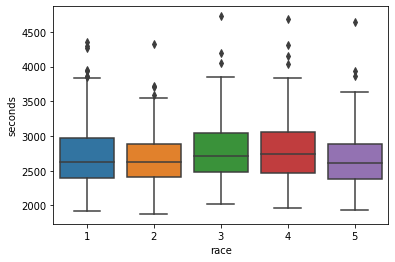

In [14]:
# lets see how race times behave in different races
sns.boxplot(x="race",y="seconds",data=aktia)

In [15]:
# looks similar...
# then lets take a look at the mean times of various competitors
times = aktia[["name","seconds"]].groupby("name").agg(["mean"])

In [16]:
# 10 fastest competitors
times.iloc[np.argsort(times["seconds"]["mean"])[:10]]

seconds
                     mean
name                     
Granberg Hannu     1877.0
Saleva Eero        1925.0
Jantunen Panu      1941.0
Valido Toni        1952.0
Heikkilä Niklas    1987.0
Kero Jukka         1991.0
Hakala Juuso       1995.0
Huusko Samuli      2009.0
Fishaye Samuel     2018.0
Lappalainen Lauri  2025.0

In [17]:
times.describe()

seconds
              mean
count   603.000000
mean   2695.829878
std     408.321296
min    1877.000000
25%    2399.500000
50%    2662.000000
75%    2941.250000
max    4532.800000

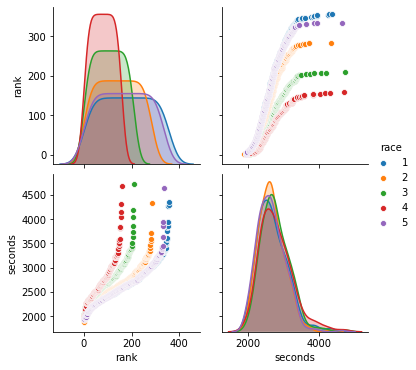

In [18]:
# seaborn pairplot is quite nice. 
# This view might not be that informative however... You notice that the time distributions are slightly 
# different for different races. As we noticed before, races 3 and 4 appear to be slowest.
sns.pairplot(aktia[["rank","seconds","race"]],hue="race")

In [19]:
# lets then merge the weather data to the dataframe.
data = aktia.merge(weather,on="race",how="outer")
data

rank  bib              name                       club  race  seconds  \
0        1  535       Saleva Eero       Helsingin Kisaveikot     1     1917   
1        2  537  Harjamäki Joonas        Viipurin Urheilijat     1     1958   
2        3  589        Kero Jukka        Turun Urheiluliitto     1     1971   
3        4  536   Heikkilä Niklas  Kuusankosken urheiluseura     1     1987   
4        5   44     Huusko Samuli         Kenttäurheilija-58     1     1993   
...    ...  ...               ...                        ...   ...      ...   
1338   331  177        Siren Meri                        NaN     5     3623   
1339   332  679       Särkkä Auni              Espoon Tapiot     5     3639   
1340   333  296        Roots Anto               ESTri / LeSi     5     3860   
1341   334  112      Mäkinen Olli                        NaN     5     3934   
1342   335   68    Kirvesmäki Ari         Kenttäurheilija-58     5     4634   

      cloud  airpressure  humidity  precipitation  snowdepth  temp  cond  \
0         4       1032.4        84            0.0          0   7.1   4.6   
1         4       1032.4        84            0.0          0   7.1   4.6   
2         4       1032.4        84            0.0          0   7.1   4.6   
3         4       1032.4        84            0.0          0   7.1   4.6   
4         4       1032.4        84            0.0          0   7.1   4.6   
...     ...          ...       ...            ...        ...   ...   ...   
1338      8       1012.5        99            0.0         21   2.5   2.3   
1339      8       1012.5        99            0.0         21   2.5   2.3   
1340      8       1012.5        99            0.0         21   2.5   2.3   
1341      8       1012.5        99            0.0         21   2.5   2.3   
1342      8       1012.5        99            0.0         21   2.5   2.3   

      visibility   wd  gust    ws  
0          45280  274   7.7   5.9  
1          45280  274   7.7   5.9  
2          45280  274   7.7   5.9  
3          45280  274   7.7   5.9  
4          45280  274   7.7   5.9  
...          ...  ...   ...   ...  
1338        3670  217  13.8  10.0  
1339        3670  217  13.8  10.0  
1340        3670  217  13.8  10.0  
1341        3670  217  13.8  10.0  
1342        3670  217  13.8  10.0  

[1343 rows x 17 columns]

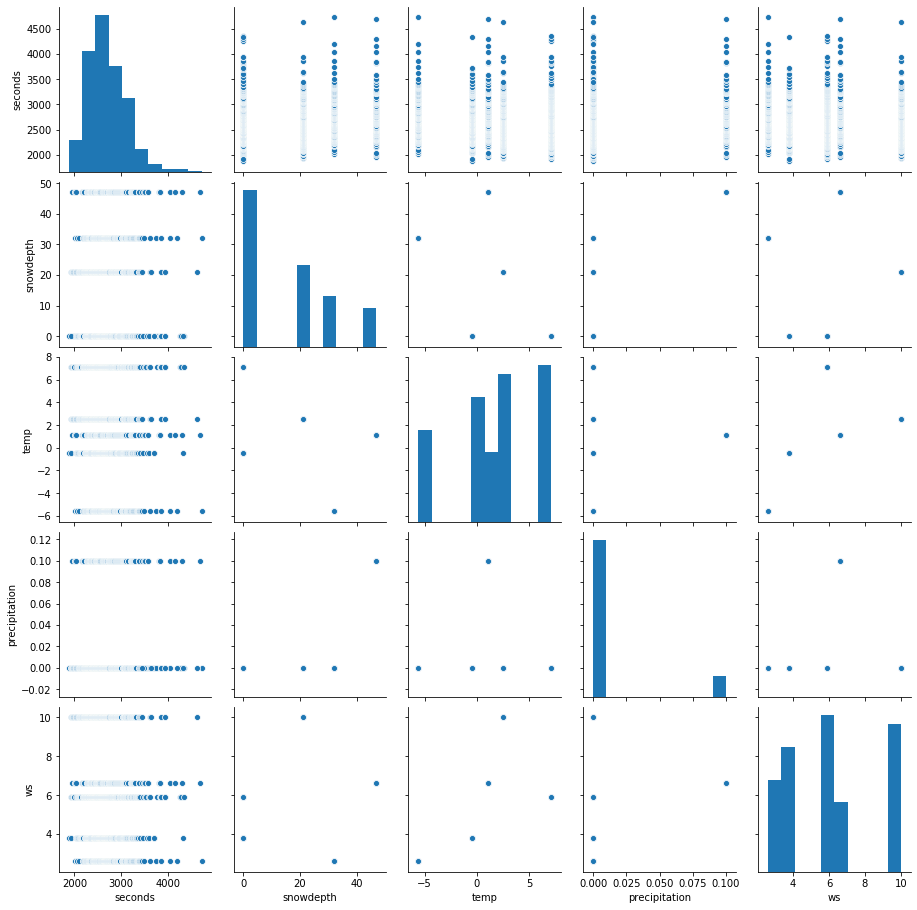

In [20]:
sns.pairplot(data,vars=["seconds","snowdepth","temp","precipitation","ws"])

In [21]:
data.describe()

rank          bib         race      seconds        cloud  \
count  1343.000000  1343.000000  1343.000000  1343.000000  1343.000000   
mean    145.307520   332.847357     2.873418  2701.207744     5.691735   
std      92.680388   240.760286     1.541401   403.188956     2.981860   
min       1.000000     1.000000     1.000000  1877.000000     0.000000   
25%      67.000000   117.000000     1.000000  2411.000000     4.000000   
50%     135.000000   281.000000     3.000000  2655.000000     8.000000   
75%     213.500000   572.000000     4.000000  2947.500000     8.000000   
max     357.000000   750.000000     5.000000  4724.000000     8.000000   

       airpressure     humidity  precipitation   snowdepth         temp  \
count   1343.00000  1343.000000    1343.000000  1343.00000  1343.000000   
mean    1018.80685    93.388682       0.011765    15.74758     1.663142   
std       11.94282     5.968566       0.032231    16.77695     4.157100   
min     1001.20000    84.000000       0.000000     0.00000    -5.600000   
25%     1005.70000    84.000000       0.000000     0.00000    -0.500000   
50%     1012.50000    95.000000       0.000000    21.00000     2.500000   
75%     1032.40000    99.000000       0.000000    32.00000     7.100000   
max     1032.40000    99.000000       0.100000    47.00000     7.100000   

              cond    visibility           wd         gust           ws  
count  1343.000000   1343.000000  1343.000000  1343.000000  1343.000000  
mean      0.664408  29710.655249   265.422189     8.101489     6.047431  
std       3.648185  19736.183789    56.143270     3.719622     2.619432  
min      -6.400000   3670.000000   189.000000     3.400000     2.600000  
25%      -1.200000   4390.000000   217.000000     4.900000     3.800000  
50%       2.300000  41940.000000   259.000000     7.700000     5.900000  
75%       4.600000  45280.000000   274.000000     8.900000     6.600000  
max       4.600000  47380.000000   359.000000    13.800000    10.000000

In [22]:
# Lets then make a new data where we make each of the competitors attributes of their own...
data2 = pd.concat([data,pd.get_dummies(data["name"])],axis=1)
data2

rank  bib              name                       club  race  seconds  \
0        1  535       Saleva Eero       Helsingin Kisaveikot     1     1917   
1        2  537  Harjamäki Joonas        Viipurin Urheilijat     1     1958   
2        3  589        Kero Jukka        Turun Urheiluliitto     1     1971   
3        4  536   Heikkilä Niklas  Kuusankosken urheiluseura     1     1987   
4        5   44     Huusko Samuli         Kenttäurheilija-58     1     1993   
...    ...  ...               ...                        ...   ...      ...   
1338   331  177        Siren Meri                        NaN     5     3623   
1339   332  679       Särkkä Auni              Espoon Tapiot     5     3639   
1340   333  296        Roots Anto               ESTri / LeSi     5     3860   
1341   334  112      Mäkinen Olli                        NaN     5     3934   
1342   335   68    Kirvesmäki Ari         Kenttäurheilija-58     5     4634   

      cloud  airpressure  humidity  precipitation  ...  Widbom Herman  \
0         4       1032.4        84            0.0  ...              0   
1         4       1032.4        84            0.0  ...              0   
2         4       1032.4        84            0.0  ...              0   
3         4       1032.4        84            0.0  ...              0   
4         4       1032.4        84            0.0  ...              0   
...     ...          ...       ...            ...  ...            ...   
1338      8       1012.5        99            0.0  ...              0   
1339      8       1012.5        99            0.0  ...              0   
1340      8       1012.5        99            0.0  ...              0   
1341      8       1012.5        99            0.0  ...              0   
1342      8       1012.5        99            0.0  ...              0   

      Widbom Kalle  Willamo Anette  Ylä-Kujala Sanni  Zych Monika  \
0                0               0                 0            0   
1                0               0                 0            0   
2                0               0                 0            0   
3                0               0                 0            0   
4                0               0                 0            0   
...            ...             ...               ...          ...   
1338             0               0                 0            0   
1339             0               0                 0            0   
1340             0               0                 0            0   
1341             0               0                 0            0   
1342             0               0                 0            0   

      favale Joonas  Äikäs Marko  Åkerman Milla  Åvall Michaela  Öman Johanna  
0                 0            0              0               0             0  
1                 0            0              0               0             0  
2                 0            0              0               0             0  
3                 0            0              0               0             0  
4                 0            0              0               0             0  
...             ...          ...            ...             ...           ...  
1338              0            0              0               0             0  
1339              0            0              0               0             0  
1340              0            0              0               0             0  
1341              0            0              0               0             0  
1342              0            0              0               0             0  

[1343 rows x 620 columns]

In [23]:
data2.columns[7:]

Index(['airpressure', 'humidity', 'precipitation', 'snowdepth', 'temp', 'cond',
       'visibility', 'wd', 'gust', 'ws',
       ...
       'Widbom Herman', 'Widbom Kalle', 'Willamo Anette', 'Ylä-Kujala Sanni',
       'Zych Monika', 'favale Joonas', 'Äikäs Marko', 'Åkerman Milla',
       'Åvall Michaela', 'Öman Johanna'],
      dtype='object', length=613)

In [34]:
# Fit a linear model, separating the effects of various competitors and weather.
model = sm.OLS(data2["seconds"],
               tools.add_constant(data2.iloc[:,7:].drop(["airpressure","humidity","cond","visibility","wd","gust"],axis=1)))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                seconds   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     62.27
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:35:33   Log-Likelihood:                -7305.6
No. Observations:                1343   AIC:                         1.583e+04
Df Residuals:                     736   BIC:                         1.898e+04
Df Model:                         606                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2727.0776      6.856    397.737      0.000    2713.617    2740.538
precipitation              -395.3773    133.060     -2.971      0.003    -656.600    -134.155
snowdepth                     3.5958      0.352     10.217      0.000       2.905       4.287
temp                          5.7149      1.238      4.618      0.000       3.285       8.144
ws                          -15.0643      1.529     -9.852      0.000     -18.066     -12.062
Aakkula Riikka               54.0243     75.369      0.717      0.474     -93.940     201.988
Aakula Riikka               100.6743     43.510      2.314      0.021      15.257     186.092
Aalto Josefina              -51.5031     53.256     -0.967      0.334    -156.055      53.049
Aalto Martin                -75.7738     75.324     -1.006      0.315    -223.650      72.102
Aaltonen Toni                94.8960     53.278      1.781      0.075      -9.698     199.490
Absetz Ilmari               227.6071     43.526      5.229      0.000     142.157     313.058
Ahdevainio Juha            -172.8709     33.728     -5.125      0.000    -239.086    -106.656
Ahdinkallio Jussi          -347.7738     75.324     -4.617      0.000    -495.650    -199.898
Ahokas Jukka               -329.6709     33.728     -9.774      0.000    -395.886    -263.456
Ahokas Kati                 463.6743     43.510     10.657      0.000     378.257     549.092
Ahonen Jukka                 72.0118     37.683      1.911      0.056      -1.967     145.990
Airas Petro                  76.2262     75.324      1.012      0.312     -71.650     224.102
Aittola Antti              -356.1452     37.724     -9.441      0.000    -430.205    -282.086
Ala-Koukkari Mika           243.1252     53.276      4.564      0.000     138.534     347.716
Alanko Tero                  46.3394     43.489      1.066      0.287     -39.039     131.718
Alasalmi Teija             1583.2262     75.324     21.019      0.000    1435.350    1731.102
Alavalkama Satu             528.7677     75.339      7.019      0.000     380.863     676.672
Alden Jan                  -163.2323     75.339     -2.167      0.031    -311.137     -15.328
Alén Heikki                -199.7738     75.324     -2.652      0.008    -347.650     -51.898
Andreev Katja               716.1541     37.694     18.999      0.000     642.154     790.154
Annala Matti                110.4650     43.566      2.536      0.011      24.936     195.994
Antikainen Pekka           -619.5031     53.256    -11.633      0.000    -724.055    -514.951
Anttalainen Jukka           272.2194     37.722      7.216      0.000     198.164     346.275
Anttonen Pentti            -241.8748     53.276     -4.540      0.000    -346.466    -137.284
Anttonen Veli-Pekka         456.6743     43.510     10.496      0.000     3